# Understanding How Large Language Models (LLMs) Work

## 🧠 What is a Large Language Model?

llm-large-language-model-ai-artificial-intelligence-technology-concept_1162612-136.avif

A **Large Language Model (LLM)** is a type of AI model trained on massive text datasets to understand and generate human-like language. These models learn patterns in text data and can perform a wide variety of natural language processing (NLP) tasks.


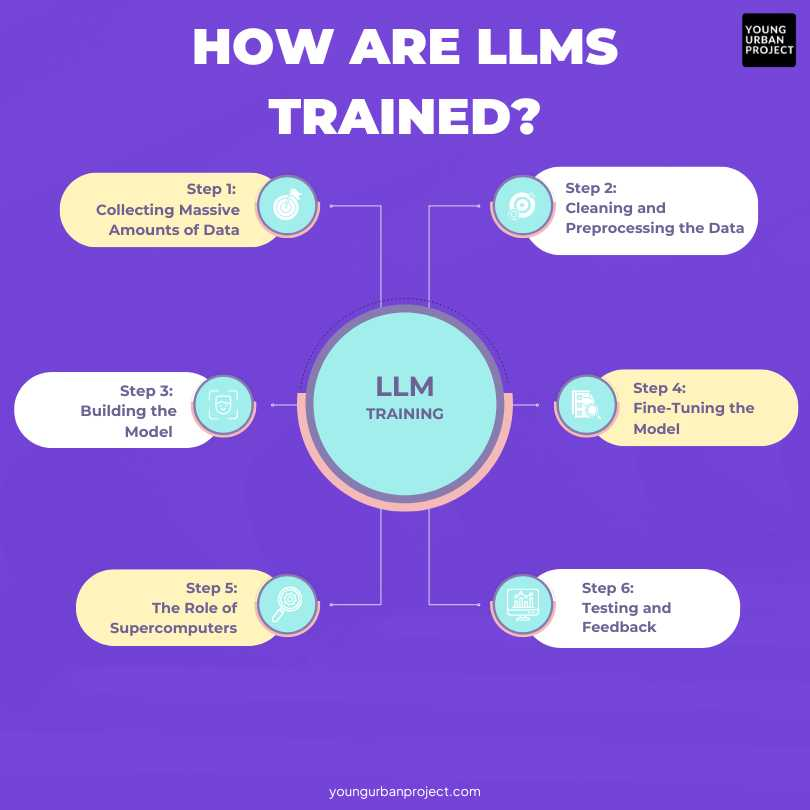


## 📏 How Big Are LLMs?

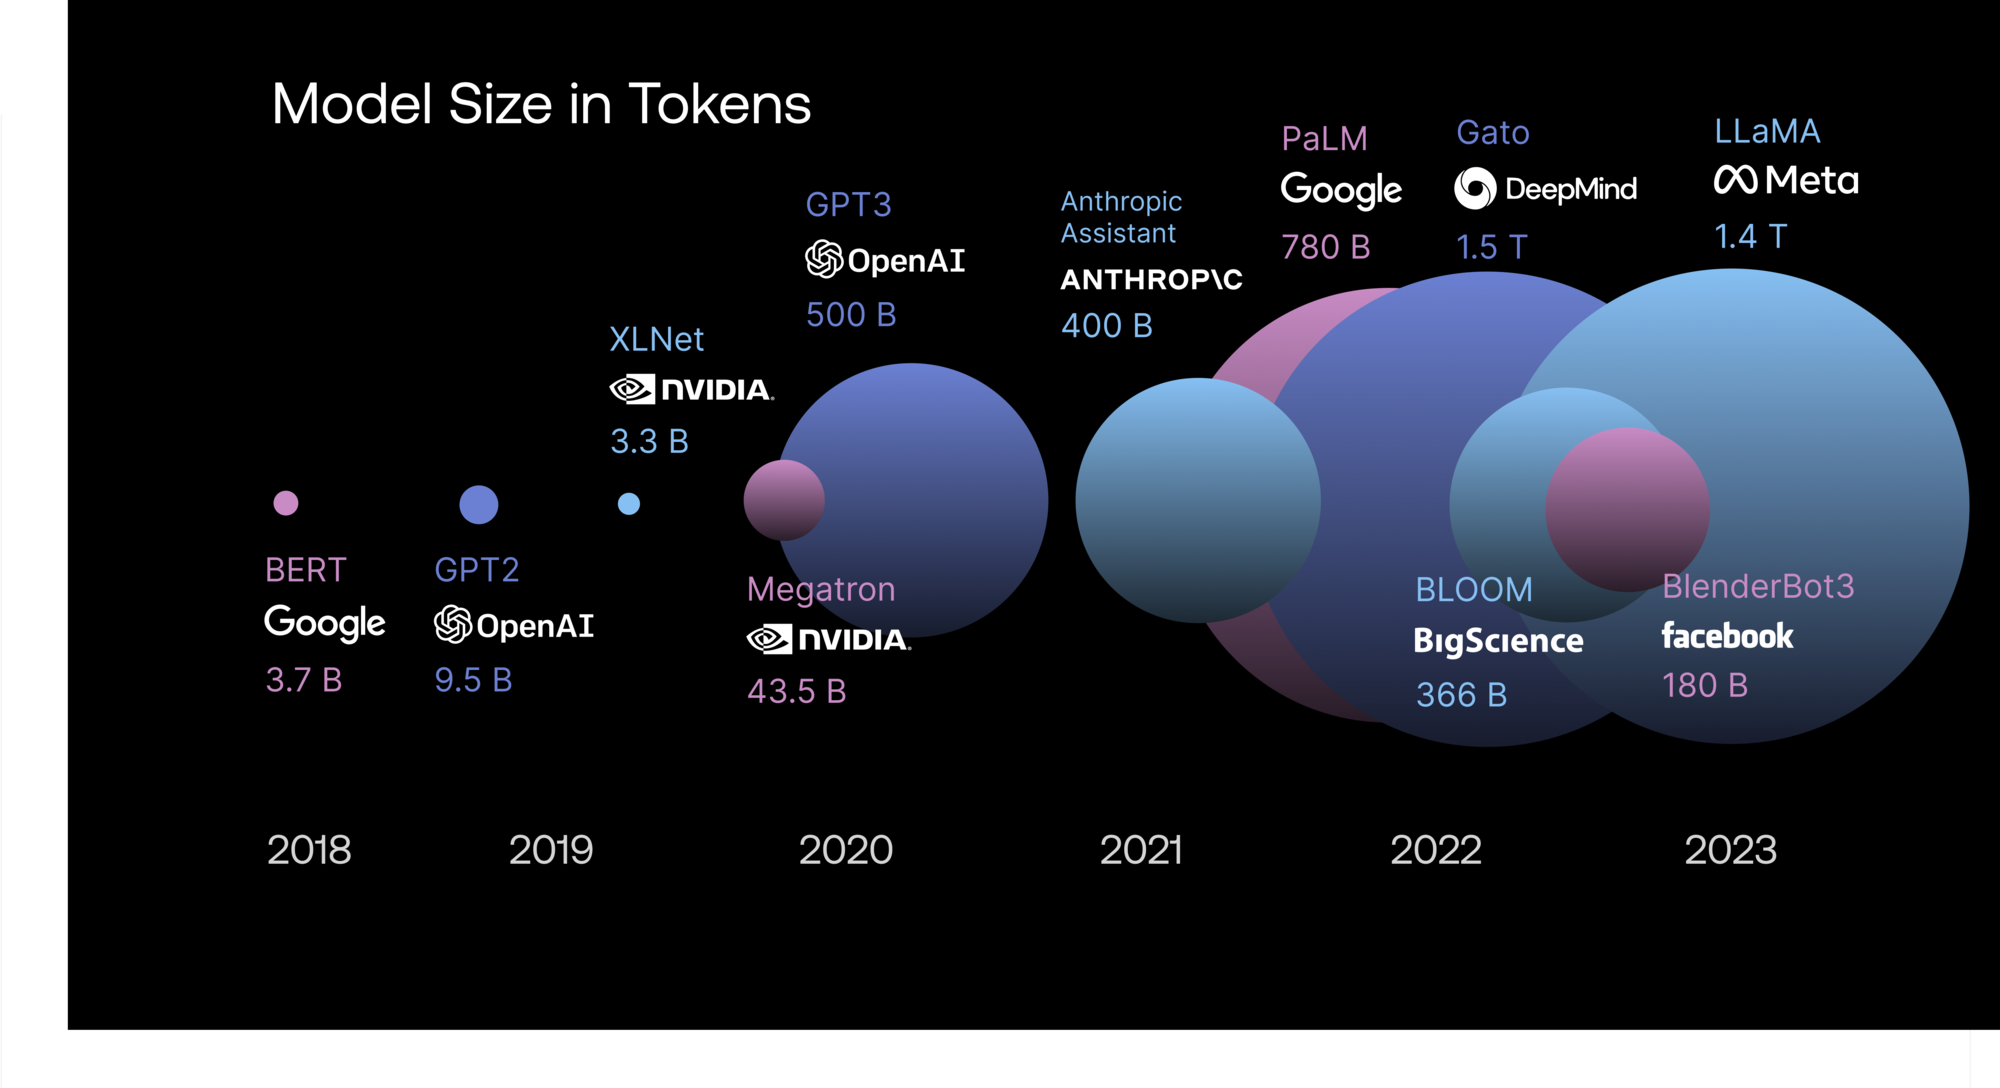

LLMs are measured by the number of **parameters**—the internal configurations learned during training. The size of these models can vary:

- **GPT-2:** ~1.5 billion parameters  
- **GPT-3:** 175 billion parameters  
- **GPT-4 (est.):** Hundreds of billions  
- **Gemini, Claude, Mistral, Mixtral, LLaMA 3, etc.** also have models ranging from billions to over a trillion parameters.

The more parameters, the more capable (but also more resource-intensive) the model tends to be.


## 🌐 How Do We Use LLMs?

You can use LLMs in two primary ways:

### 1. **API Access (Cloud-based)**
- Providers like **OpenAI**, **Anthropic**, **Google (Gemini)**, and **Groq** offer models via APIs.
- Fast, scalable, and updated—great for production use.

### 2. **Local Deployment**
- Using frameworks like **Hugging Face Transformers**, **Ollama**, **LM Studio**, or **GGUF + llama.cpp**, you can run smaller models locally.
- Good for privacy, experimentation, and offline applications.


## 🧱 Building AI Agents with LLMs


LLMs are at the **core of modern AI agents**. They give the agent the power to:

- **Understand** context and instructions
- **Decide** next steps
- **Plan** a course of action
- **Call appropriate tools or APIs**

Thanks to LLMs, agents can autonomously **reason, retrieve data, and act**—crucial for tools like AutoGPT, LangGraph, Open Agents, and more.


## 🛠️ LLMs Replaced Traditional ML in NLP Tasks

Before LLMs, each NLP task needed a specialized model. Now, a well-prompted LLM can handle:

- **Sentiment Analysis**
- **Text Summarization**
- **Named Entity Recognition (NER)**
- **Code Generation**
- **Document-based Question Answering**
- **FAQ Bots and Chat Interfaces**

All of this is made possible through **Prompt Engineering**.
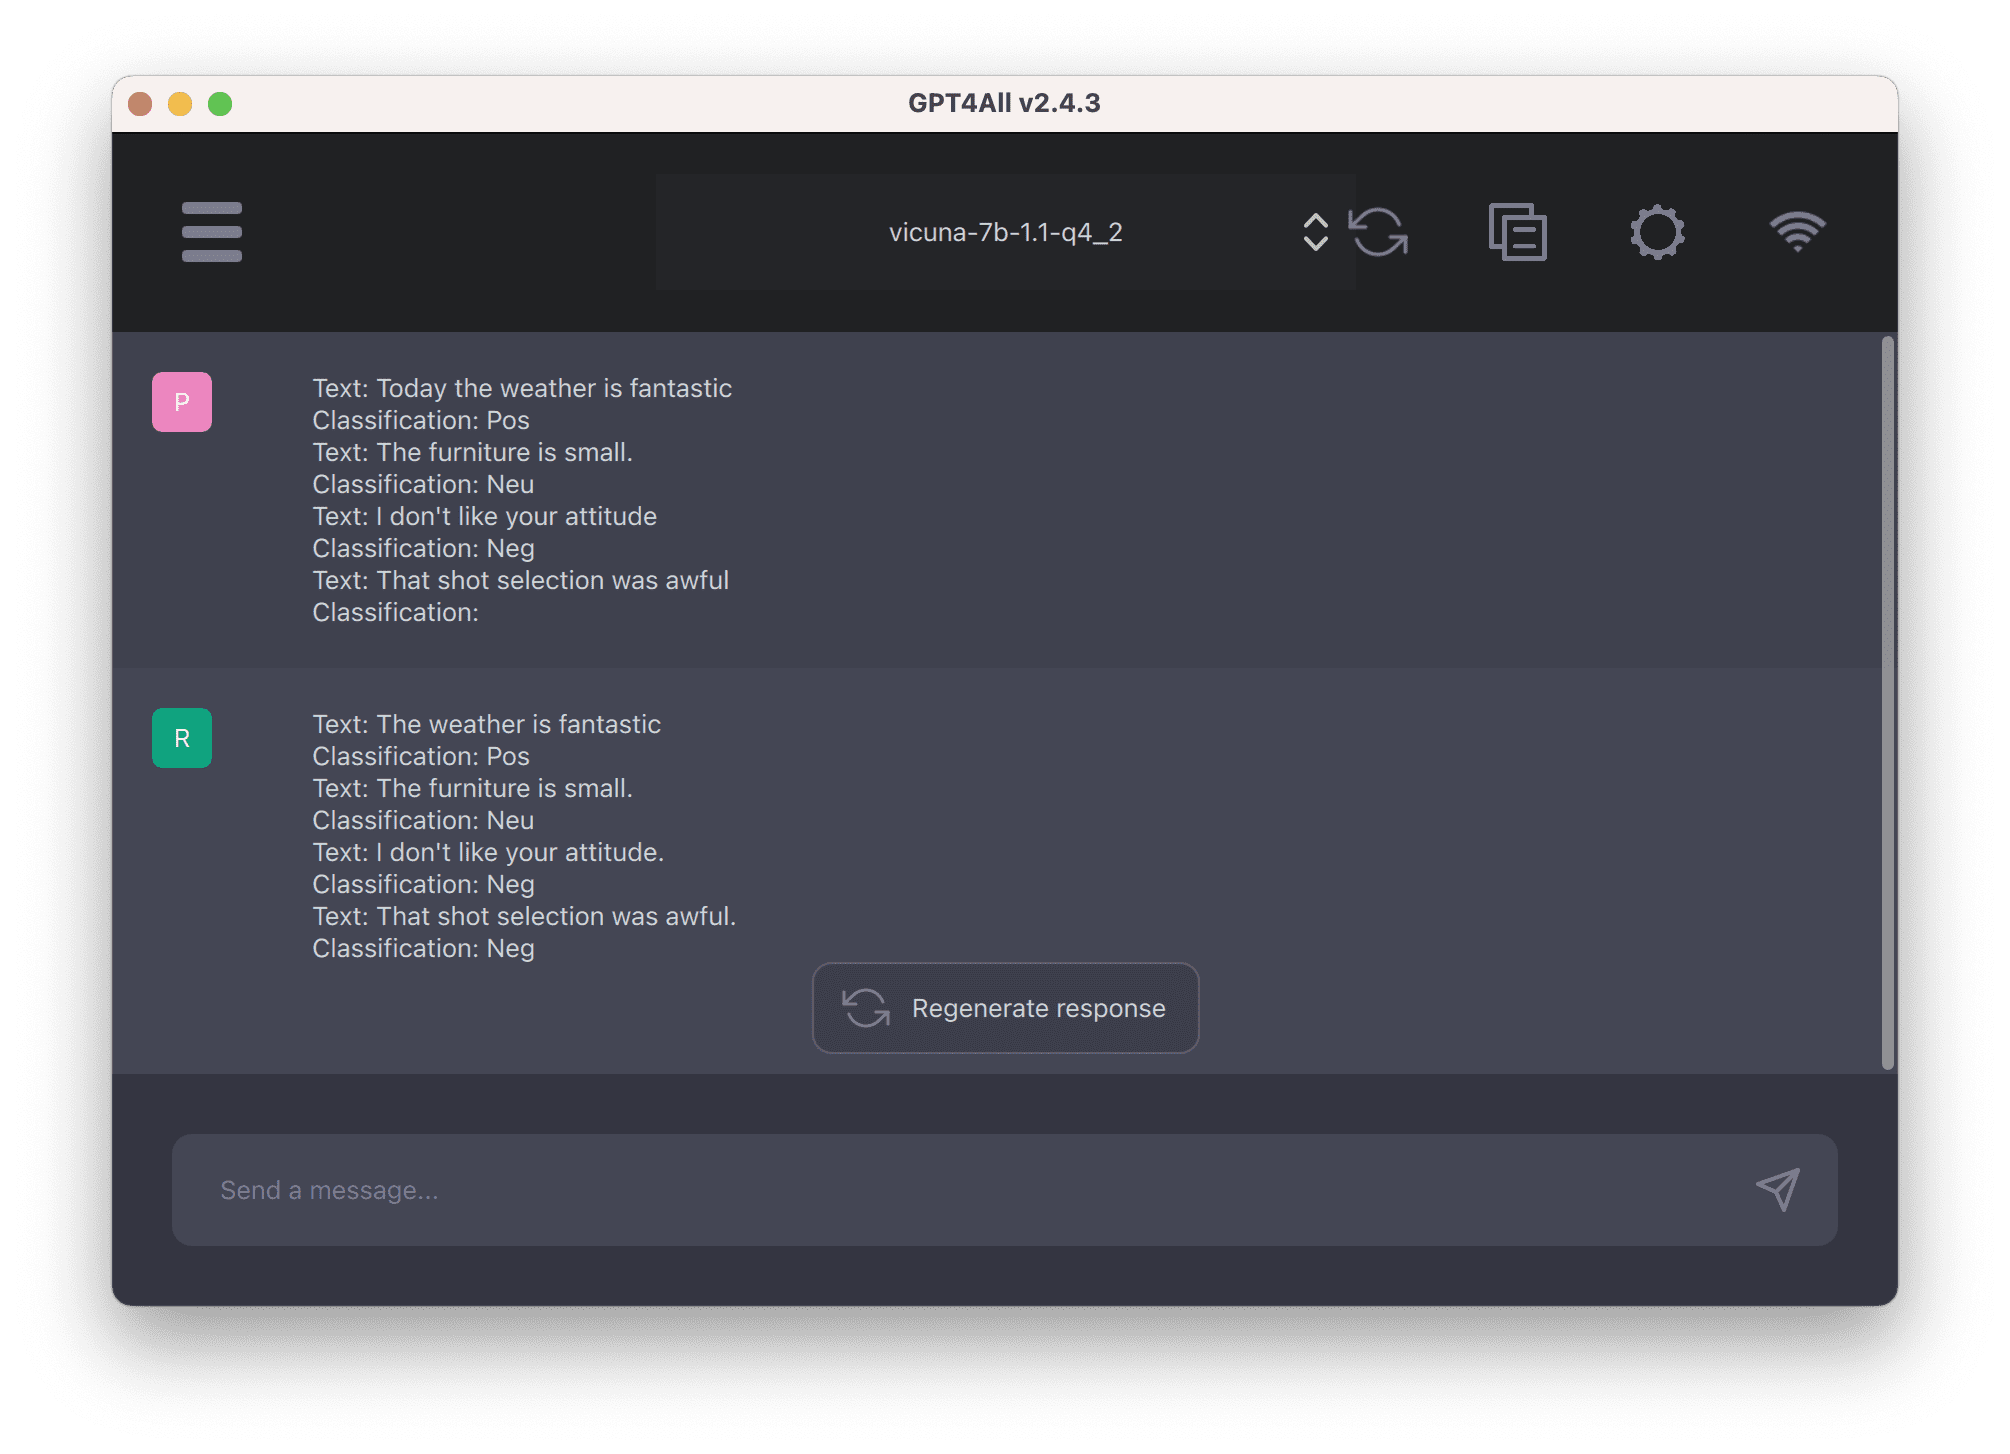

## ✍️ The Power of Prompt Engineering

**Prompt Engineering** is the art of designing effective inputs (prompts) for LLMs to get desired outputs.

- A small change in prompt = Big change in response
- Helps control tone, format, style, and logic
- Enables few-shot or zero-shot learning
- Critical for fine-tuning model behavior **without retraining**

Prompt Engineering is a **superpower** in the AI world—especially for builders, researchers, and developers.


### Zero shot
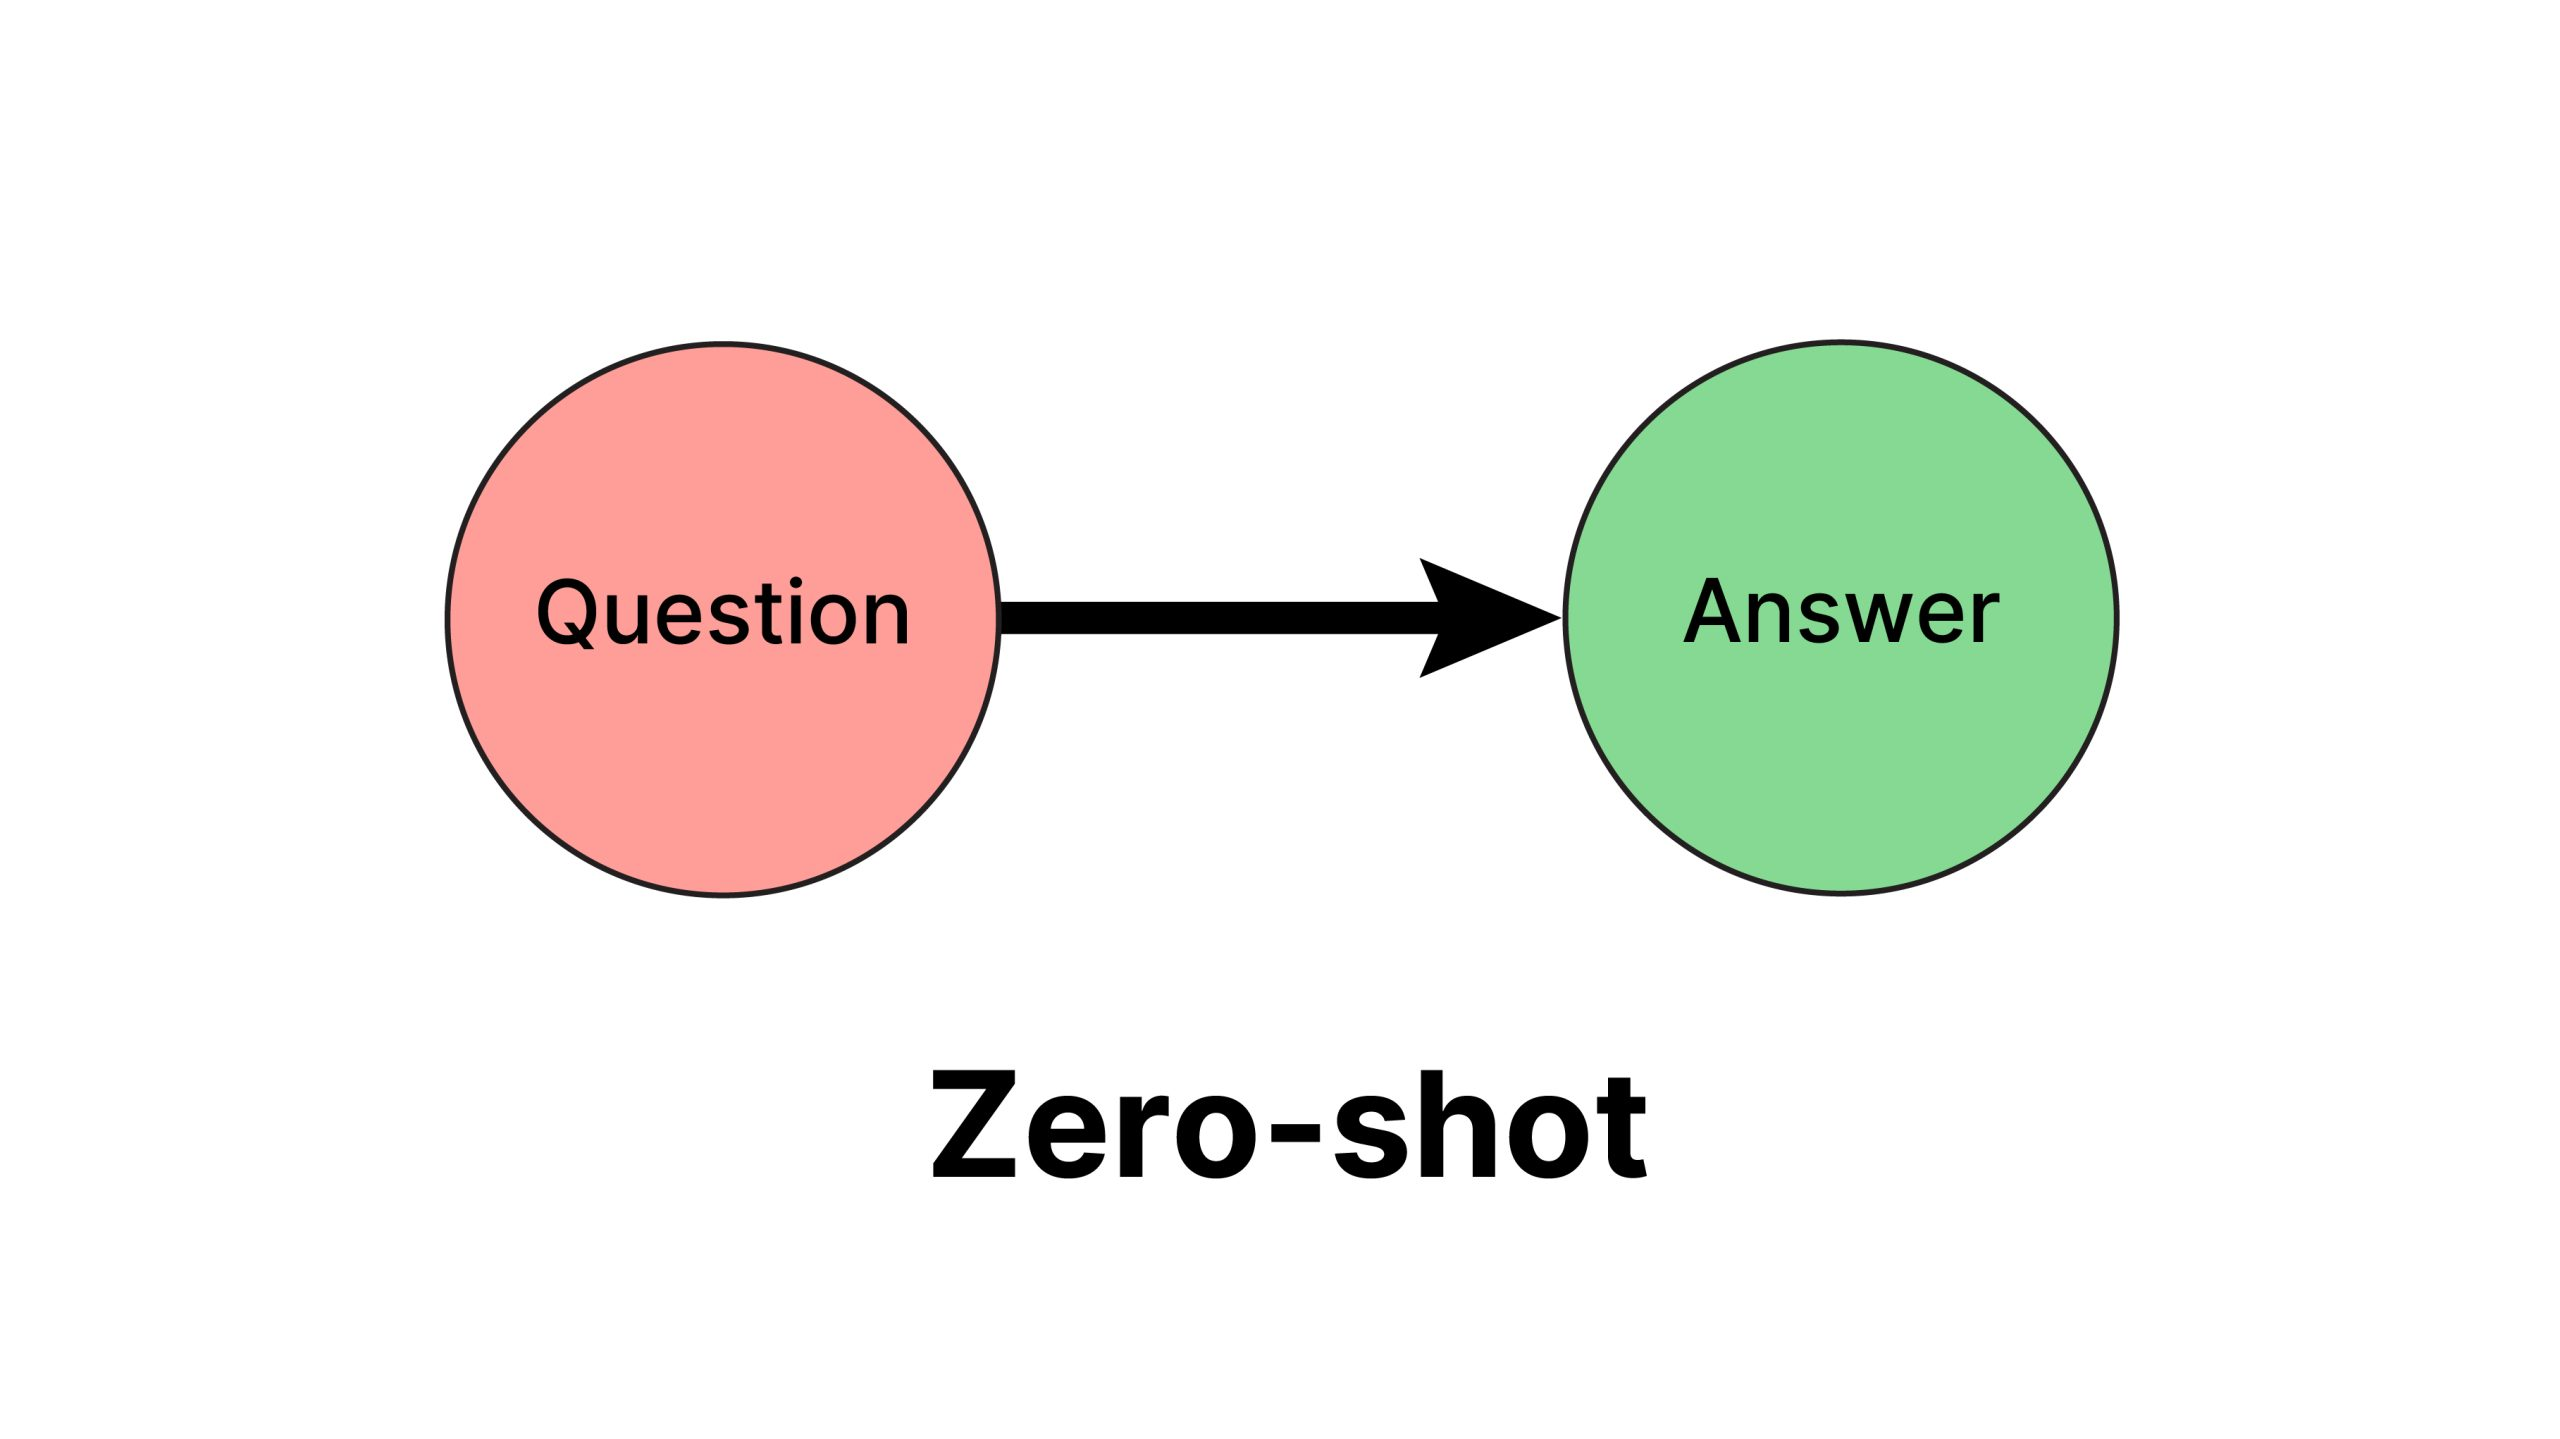


### Few Shot  (Give multiple Examples)

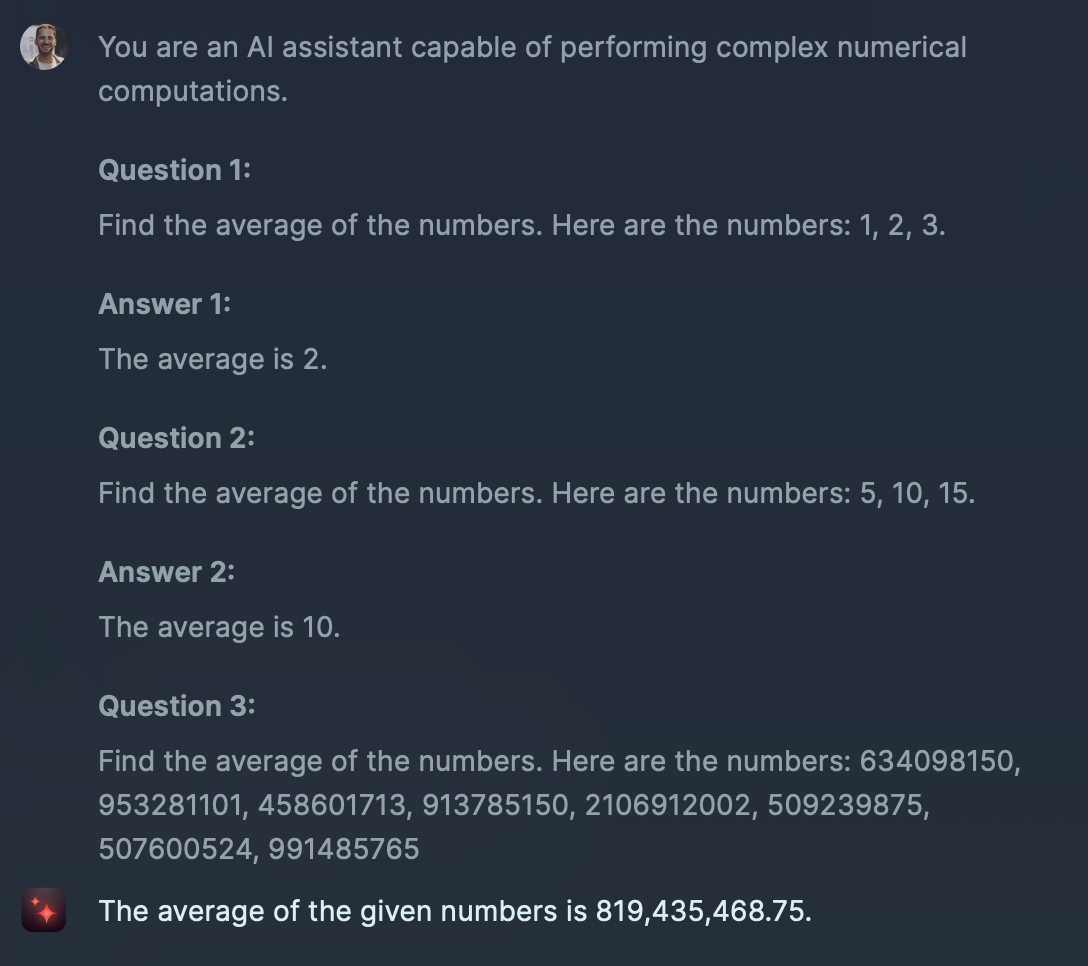

### CHAIN OF THOUGHT  (Breaking the problem and making it easy)

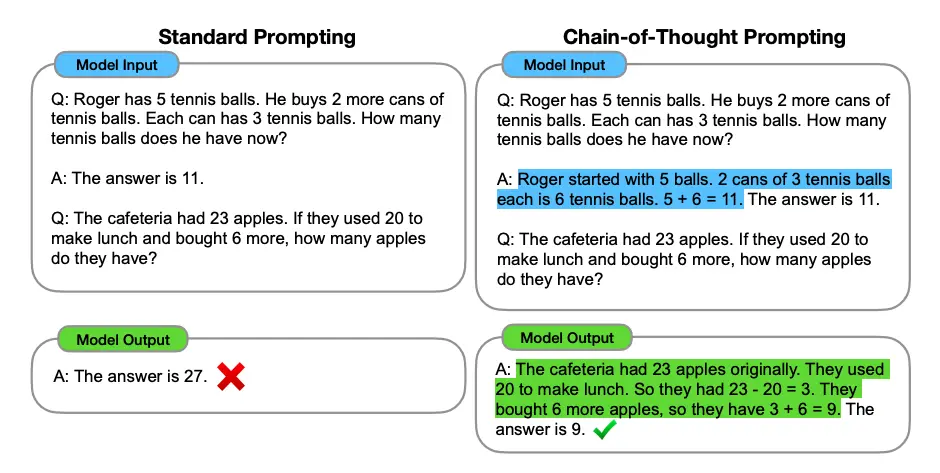


# INSTALL PACKAGES

In [ ]:
!pip install langchain_ollama langchain langchain-community langchain-core

# Download Ollama and Pull Models (Embedding Model and LLM Model)

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

## Pulling the Embedding Model

In [ ]:
!ollama pull nomic-embed-text

In [ ]:
!pip install ollama

## Pulling the LLM

In [ ]:
!ollama pull gemma3:4b

# Prompt Engineering Fundamentals

## 🧭 The Structure of a Good Prompt
1. **Role** - Define who the model should behave like.
2. **Task Instruction** - Clearly state what needs to be done.
3. **Example (Few-Shot Prompting)** - (Optional) Provide an example input and output.

### 🔑 Prompt Template


You are a professional {role}. Your task is to {task}.
Input: {input_text}
Output:


## 🔍 Why This Works
- **Setting a role** primes the LLM’s internal context.
- **Clear instruction** removes ambiguity.
- **Examples** help the model learn format and logic from context.


1️⃣ Sentiment Analysis

In [ ]:
# Let's write a LangChain version of the prompt-based sentiment analyzer using Ollama as the LLM model.
from langchain_community.chat_models import ChatOllama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Define the prompt template
template = """You are a sentiment analysis expert.

Your task is to determine whether the sentiment of a text is Positive, Negative, or Neutral.
Only Output Positive, Negative or Neutral

Example:
Input: I love this phone! The battery lasts all day.
Output: Positive

Input: I am disappointed with the camera quality.
Output: Negative

Input: The product arrived on time and works as expected.
Output: Neutral

Input: {text}
Output:"""

prompt = PromptTemplate.from_template(template)

# Use the LangChain ChatOllama wrapper
llm = ChatOllama(model="gemma3:4b")
chain = LLMChain(llm=llm, prompt=prompt)

# Test with multiple inputs
test_inputs = [
    "I love the camera quality and the performance is amazing!",
    "This product is terrible and I want a refund.",
    "It's just fine. Does what it says, nothing more.",
    "Absolutely fantastic, exceeded my expectations!"
]

results = [chain.run(text=inp) for inp in test_inputs]
results


['Positive\n', 'Negative\n', 'Neutral\n', 'Positive\n']

## 2️⃣ Named Entity Recognition (NER)

In [ ]:

# Define the prompt template
template = """You are an NLP model that extracts Named Entities from text.
Return the entities in the format:
[{{"entity": "Google", "type": "ORG"}}, {{"entity": "Sundar Pichai", "type": "PERSON"}}]
Do not add anything else. Be strict.

Example:
Input: Sundar Pichai is the CEO of Google.
Output: [{{"entity": "Sundar Pichai", "type": "PERSON"}}, {{"entity": "Google", "type": "ORG"}}]

Input: {text}
Output:"""

# Create the prompt and model chain
prompt = PromptTemplate.from_template(template)
llm = ChatOllama(model="gemma3:4b")
chain = LLMChain(llm=llm, prompt=prompt)

# List of test inputs
test_inputs = [
    "Elon Musk founded SpaceX and also runs Tesla.",
    "Tim Cook leads Apple Inc.",
    "Barack Obama was born in Hawaii and served as president.",
    "Sundar Pichai works at Google."
]

# Run and print results
for inp in test_inputs:
    result = chain.run(text=inp)
    print(f"Input: {inp}\nEntities: {result.strip()}\n")


Input: Elon Musk founded SpaceX and also runs Tesla.
Entities: [{"entity": "Elon Musk", "type": "PERSON"}, {"entity": "SpaceX", "type": "ORG"}, {"entity": "Tesla", "type": "ORG"}]

Input: Tim Cook leads Apple Inc.
Entities: [{"entity": "Tim Cook", "type": "PERSON"}, {"entity": "Apple Inc.", "type": "ORG"}]

Input: Barack Obama was born in Hawaii and served as president.
Entities: [{"entity": "Barack Obama", "type": "PERSON"}, {"entity": "Hawaii", "type": "GPE"}]

Input: Sundar Pichai works at Google.
Entities: [{"entity": "Sundar Pichai", "type": "PERSON"}, {"entity": "Google", "type": "ORG"}]



# 3️⃣ Summarization

In [ ]:

# Define the prompt template for summarization
template = """You are a professional summarizer. Your task is to write a concise summary of the given text in 2-3 sentences.

Text:
{text}

Summary:"""

# Set up the LangChain components
prompt = PromptTemplate.from_template(template)
llm = ChatOllama(model="gemma3:4b")
chain = LLMChain(llm=llm, prompt=prompt)

# List of texts to summarize
texts = [
    "Safely aligning powerful AI systems is one of the most important unsolved problems for our mission. Techniques like learning from human feedback are helping us get closer, and we are actively researching new techniques to help us fill the gaps.",
    "The Mars rover Perseverance has successfully collected samples from the Martian surface. NASA scientists hope these samples will help determine whether life ever existed on Mars.",
    "Open-source software is rapidly transforming the technology landscape, enabling faster innovation, community collaboration, and cost-effective deployment.",
    "Climate change continues to affect global ecosystems, causing extreme weather events and threatening biodiversity across continents."
]

# Run the chain on each input and print summaries
for text in texts:
    summary = chain.run(text=text)
    print(f"Original:\n{text}\n\nSummary:\n{summary.strip()}\n{'-'*60}\n")


Original:
Safely aligning powerful AI systems is one of the most important unsolved problems for our mission. Techniques like learning from human feedback are helping us get closer, and we are actively researching new techniques to help us fill the gaps.

Summary:
Aligning powerful AI systems with human values is a critical challenge. Current methods, such as learning from human feedback, are making progress, but further research and development are needed to fully address this complex issue.  Ultimately, ensuring AI’s safety and alignment remains a top priority.
------------------------------------------------------------

Original:
The Mars rover Perseverance has successfully collected samples from the Martian surface. NASA scientists hope these samples will help determine whether life ever existed on Mars.

Summary:
NASA’s Perseverance rover has successfully gathered samples from Mars, marking a significant step in the search for extraterrestrial life. These collected samples are no

## 4️⃣ Code Generation

In [ ]:
# Define the prompt template for Python code generation
template = """You are a Python coding assistant. Your task is to generate Python code that solves the described problem.

Problem:
{problem}

Code:"""

# Create the prompt and chain
prompt = PromptTemplate.from_template(template)
llm = ChatOllama(model="gemma3:4b")
chain = LLMChain(llm=llm, prompt=prompt)

# List of example problems
problems = [
    "Write a function that takes a list of integers and returns a list of only the even numbers.",
    "Write a Python function that checks if a string is a palindrome.",
    "Write a function that returns the factorial of a number using recursion.",
    "Write code to read a text file and count the number of words."
]

# Run the chain on each problem and print the output
for problem in problems:
    code_output = chain.run(problem=problem)
    print(f"Problem:\n{problem}\n\nGenerated Code:\n{code_output.strip()}\n{'-'*60}\n")


Problem:
Write a function that takes a list of integers and returns a list of only the even numbers.

Generated Code:
```python
def get_even_numbers(numbers):
  """
  This function takes a list of integers and returns a list of only the even numbers.
  """
  even_numbers = []
  for number in numbers:
    if number % 2 == 0:
      even_numbers.append(number)
  return even_numbers
```
------------------------------------------------------------

Problem:
Write a Python function that checks if a string is a palindrome.

Generated Code:
```python
def is_palindrome(text):
    """
    Checks if a string is a palindrome.

    A palindrome is a string that reads the same backward as forward,
    ignoring case and non-alphanumeric characters.

    Args:
      text: The string to check.

    Returns:
      True if the string is a palindrome, False otherwise.
    """
    processed_string = ''.join(char.lower() for char in text if char.isalnum())
    return processed_string == processed_string[::-

## 5️⃣ Question-Answer Bot with Embedding Search
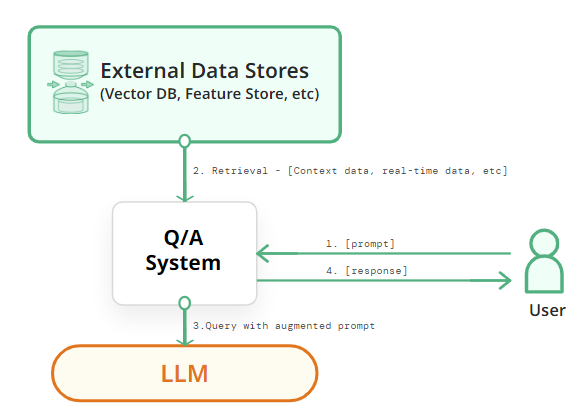

# Question Answering using Embeddings

## How it Works:
1. **Text Chunking**: Split a document into chunks.
2. **Embedding**: Convert each chunk into a vector using an embedding model.
3. **Query Embedding**: Convert the user’s question into a vector.
4. **Similarity Search**: Find the most similar chunk using cosine similarity.
5. **Answer Generation**: Use the top chunk(s) as context to prompt the LLM.

## Tools:
- `ollama run nomic-embed-text` for embeddings
- `faiss` for vector search


In [ ]:
!!pip install faiss-cpu

['Collecting faiss-cpu',
 '  Downloading faiss_cpu-1.11.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (4.8 kB)',
 'Requirement already satisfied: numpy<3.0,>=1.25.0 in /usr/local/lib/python3.11/dist-packages (from faiss-cpu) (2.0.2)',
 'Requirement already satisfied: packaging in /usr/local/lib/python3.11/dist-packages (from faiss-cpu) (24.2)',
 'Downloading faiss_cpu-1.11.0-cp311-cp311-manylinux_2_28_x86_64.whl (31.3 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/31.3 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b3.7/31.3 MB\x1b \x1b111.7 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b9.1/31.3 MB\x1b \x1b132.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━\x1b \x1b14.8/31.3 MB\x1b \x1b161.0 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Step 1: Load embedding model and LLM
embed_model = SentenceTransformer('all-MiniLM-L6-v2')
llm = ChatOllama(model="gemma3:4b")

# Step 2: Create sample context chunks
chunks = [
    "The Eiffel Tower is located in Paris.",
    "Python is a programming language used for data science.",
    "OpenAI develops large language models like ChatGPT.",
    "The Great Wall of China is visible from space.",
    "Water boils at 100 degrees Celsius under standard conditions.",
    "The mitochondrion is the powerhouse of the cell.",
    "Mount Everest is the tallest mountain above sea level.",
    "Shakespeare wrote Hamlet and Macbeth.",
    "Tesla produces electric vehicles and solar products.",
    "Amazon is a large online retailer founded by Jeff Bezos.",
    "The Moon orbits the Earth approximately every 27.3 days.",
    "The speed of light is about 299,792 kilometers per second.",
    "Albert Einstein developed the theory of relativity.",
    "Venus is the second planet from the Sun.",
    "The Pacific Ocean is the largest and deepest ocean on Earth.",
    "Bacteria are single-celled microorganisms.",
    "The capital of Japan is Tokyo.",
    "Photosynthesis occurs in the chloroplasts of plant cells.",
    "Leonardo da Vinci painted the Mona Lisa.",
    "Bitcoin is a decentralized digital currency."
]

# Step 3: Embed chunks and index them
chunk_vectors = embed_model.encode(chunks)
index = faiss.IndexFlatL2(chunk_vectors.shape[1])
index.add(np.array(chunk_vectors))

# Step 4: Define prompt template
template = """Use the following context to answer the question:
Context: {context}
Question: {question}
Answer:"""
prompt = PromptTemplate.from_template(template)
chain = LLMChain(llm=llm, prompt=prompt)

# Step 5: Define questions and run chain with retrieved context
questions = [
    "Where is the Eiffel Tower?",
    "Who painted the Mona Lisa?",
    "What does Tesla produce?",
    "What is the speed of light?",
    "Where does photosynthesis happen in plant cells?"
]



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Run the chain and print results nicely
results = []
for question in questions:
    query_vec = embed_model.encode([question])
    _, idx = index.search(np.array(query_vec), k=1)
    top_chunk = chunks[idx[0][0]]
    answer = chain.run(context=top_chunk, question=question).strip()
    results.append((question, top_chunk, answer))

# Nicely formatted output
for i, (question, context, answer) in enumerate(results, 1):
    print(f"🧠 Question {i}: {question}")
    print(f"📚 Retrieved Context: {context}")
    print(f"✅ Answer: {answer}")
    print("-" * 70)


🧠 Question 1: Where is the Eiffel Tower?
📚 Retrieved Context: The Eiffel Tower is located in Paris.
✅ Answer: Paris.
----------------------------------------------------------------------
🧠 Question 2: Who painted the Mona Lisa?
📚 Retrieved Context: Leonardo da Vinci painted the Mona Lisa.
✅ Answer: Leonardo da Vinci.
----------------------------------------------------------------------
🧠 Question 3: What does Tesla produce?
📚 Retrieved Context: Tesla produces electric vehicles and solar products.
✅ Answer: Tesla produces electric vehicles and solar products.
----------------------------------------------------------------------
🧠 Question 4: What is the speed of light?
📚 Retrieved Context: The speed of light is about 299,792 kilometers per second.
✅ Answer: 299,792 kilometers per second.
----------------------------------------------------------------------
🧠 Question 5: Where does photosynthesis happen in plant cells?
📚 Retrieved Context: Photosynthesis occurs in the chloroplasts of